# Data Loading 

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [210]:
#load data
df = pd.read_csv('titanic_train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


some of columns is not importent for modal building. so have to drop that columns

In [211]:
#droping not importent columns
df = df.drop(columns=['Name','Unnamed: 0','Ticket','PassengerId'])

In [212]:
df.shape

(891, 9)

In [213]:
#chacking null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Null values are present in this dataset.

In [214]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

We can see that some columns like Age, Cabin and Embarked has null values.
we will drop it but as we know that cabin has more null values. if i drop cabin's null values it will drop most of tha data part.

In [215]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('B96')
df=df.dropna(subset=['Embarked'])

In [216]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Data information

In [217]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [218]:
#now data information about which type of data is present.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     889 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


1. Int       => Survived, Pclass, Age, Sibsp, Parch, Fare.
2. Objective => Sex, Cabin.
3. Targte column => Survived

In [219]:
#lets saprate  objective and numerical data
numerical_data = df[['Pclass','Age','SibSp','Parch','Fare']].copy()
objective_data = df[['Sex','Cabin','Embarked']].copy()
target_column = df[['Survived']].copy()

In [220]:
#deal with numerical data
numerical_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
#chacking skewness
numerical_data.skew().sort_values()

Pclass   -0.636998
Age       0.431720
Parch     2.745160
SibSp     3.691058
Fare      4.801440
dtype: float64

As we know that Only Fare and Age column are continues. and only fare column has skewness. so we can remove skewness by using power transform

In [222]:
#we can only deal with Fare because that has high skewness
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')

In [223]:
numerical_data_pt = pt.fit_transform(numerical_data)

In [224]:
numerical_data_pt = pd.DataFrame(numerical_data_pt,columns=['Pclass','Age','SibSp','Parch','Fare'])
numerical_data_pt.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.862195,-0.554560,1.370604,-0.561077,-0.876580
1,-1.462715,0.661897,1.370604,-0.561077,1.341242
2,0.862195,-0.239235,-0.680934,-0.561077,-0.787660
3,-1.462715,0.441937,1.370604,-0.561077,1.071865
4,0.862195,0.441937,-0.680934,-0.561077,-0.772006


In [225]:
#again chack skewness
numerical_data_pt.skew().sort_values(ascending=False)

Parch     1.225383
SibSp     0.805424
Age       0.064775
Fare     -0.041424
Pclass   -0.444702
dtype: float64

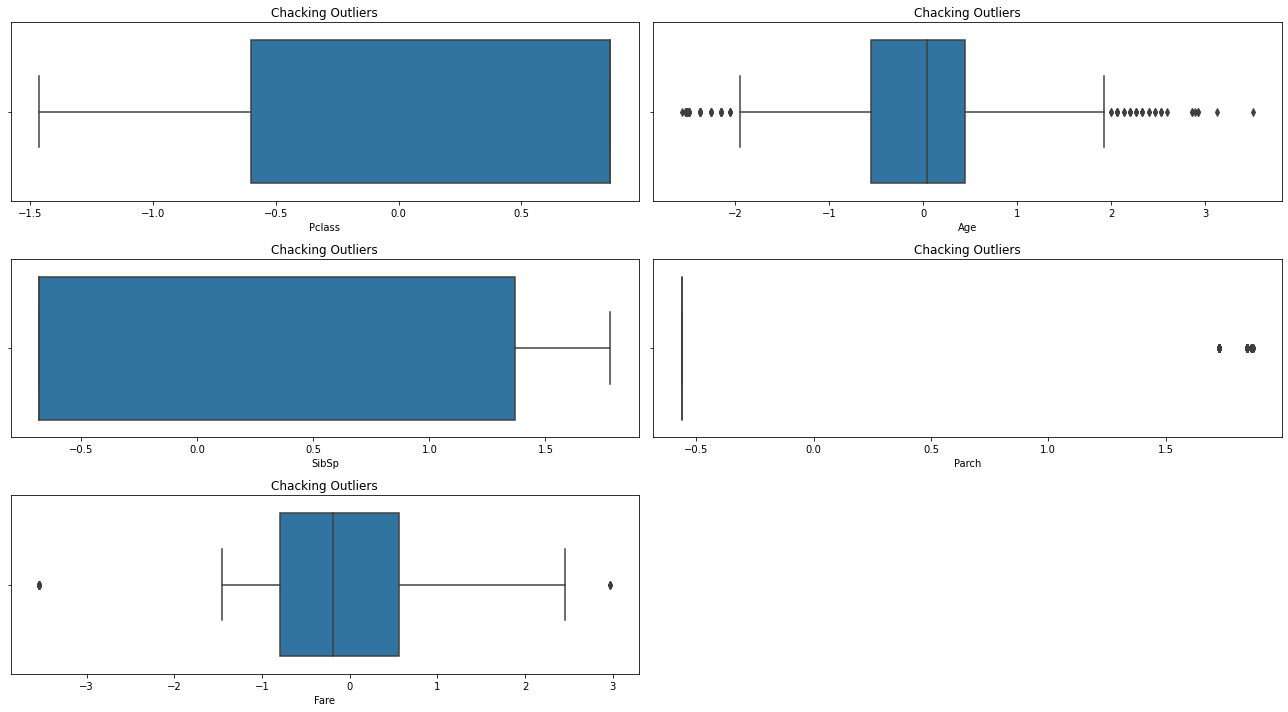

In [226]:
#skewness has gone now deal with oullier
plt.figure(figsize=(18,10),facecolor='white')
plot = 1
for column in numerical_data_pt:
    if plot<=6:
        plt.subplot(3,2,plot)
        sns.boxplot(numerical_data_pt[column])
        plt.title("Chacking Outliers")
    plot+=1
plt.tight_layout()


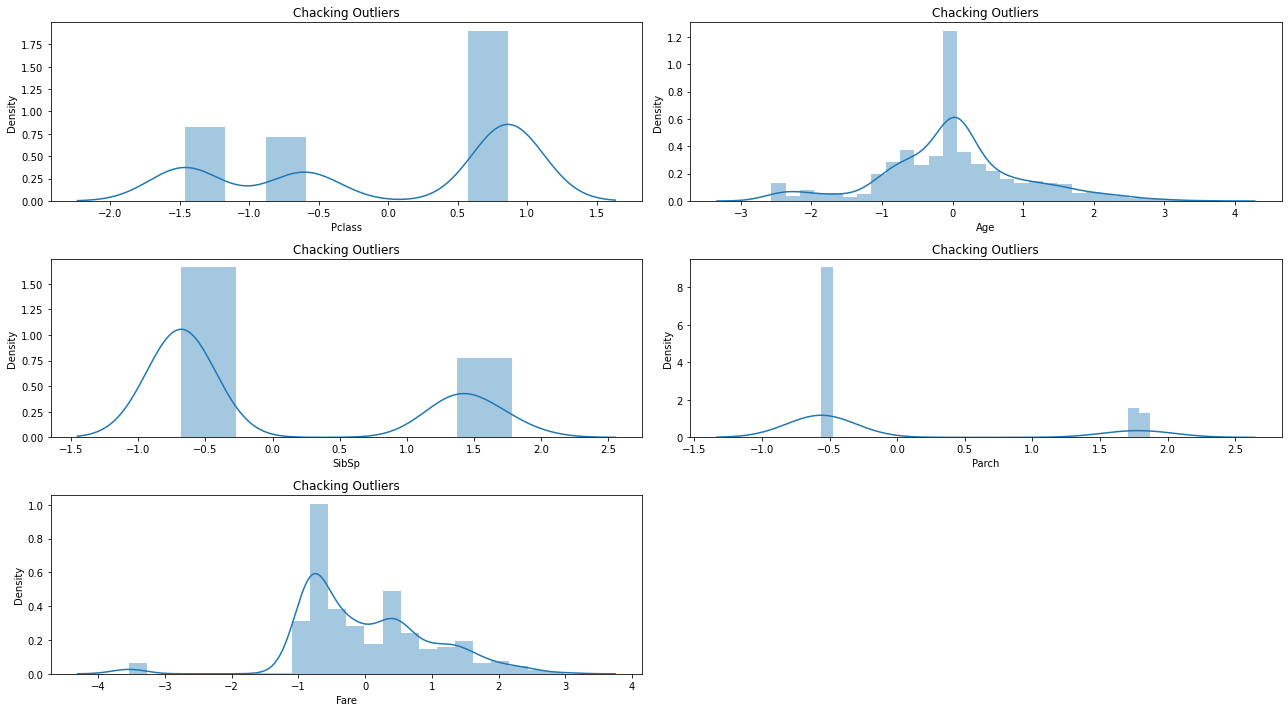

In [227]:
plt.figure(figsize=(18,10),facecolor='white')
plot = 1
for column in numerical_data_pt:
    if plot<=6:
        plt.subplot(3,2,plot)
        sns.distplot(numerical_data_pt[column])
        plt.title("Chacking Outliers")
    plot+=1
plt.tight_layout()


Outliers are present in data set so we can deal with by using zscore method

In [228]:
#remove outlier
from scipy.stats import zscore

z = np.abs(zscore(numerical_data_pt))
thereshold = 3
np.where(z>3)

(array([178, 262, 270, 276, 301, 412, 465, 480, 596, 629, 632, 673, 731,
        805, 814, 821, 849], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1], dtype=int64))

In [229]:
#removing that data
numerical_data_pt = numerical_data_pt[(z<3).all(axis=1)]
numerical_data_pt.shape

(872, 5)

In [230]:
#remove from other dataset
objective_data = objective_data.drop(index=[178, 262, 270, 276, 301, 412, 465, 480, 596, 629, 632, 673, 731, 805, 814, 821, 849])

In [231]:
objective_data.shape

(872, 3)

In [232]:
target_column = target_column.drop(index=[178, 262, 270, 276, 301, 412, 465, 480, 596, 629, 632, 673, 731,805, 814, 821, 849])
target_column.shape

(872, 1)

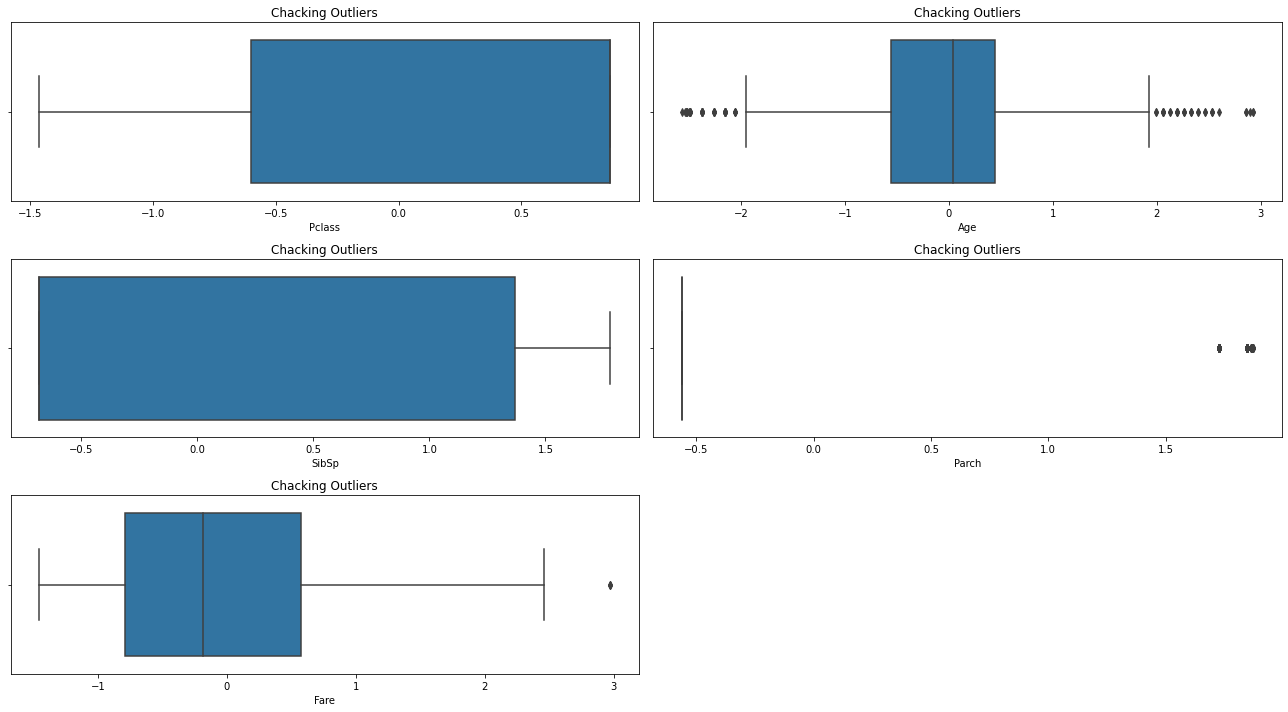

In [233]:
plt.figure(figsize=(18,10),facecolor='white')
plot = 1
for column in numerical_data_pt:
    if plot<=6:
        plt.subplot(3,2,plot)
        sns.boxplot(numerical_data_pt[column])
        plt.title("Chacking Outliers")
    plot+=1
plt.tight_layout()


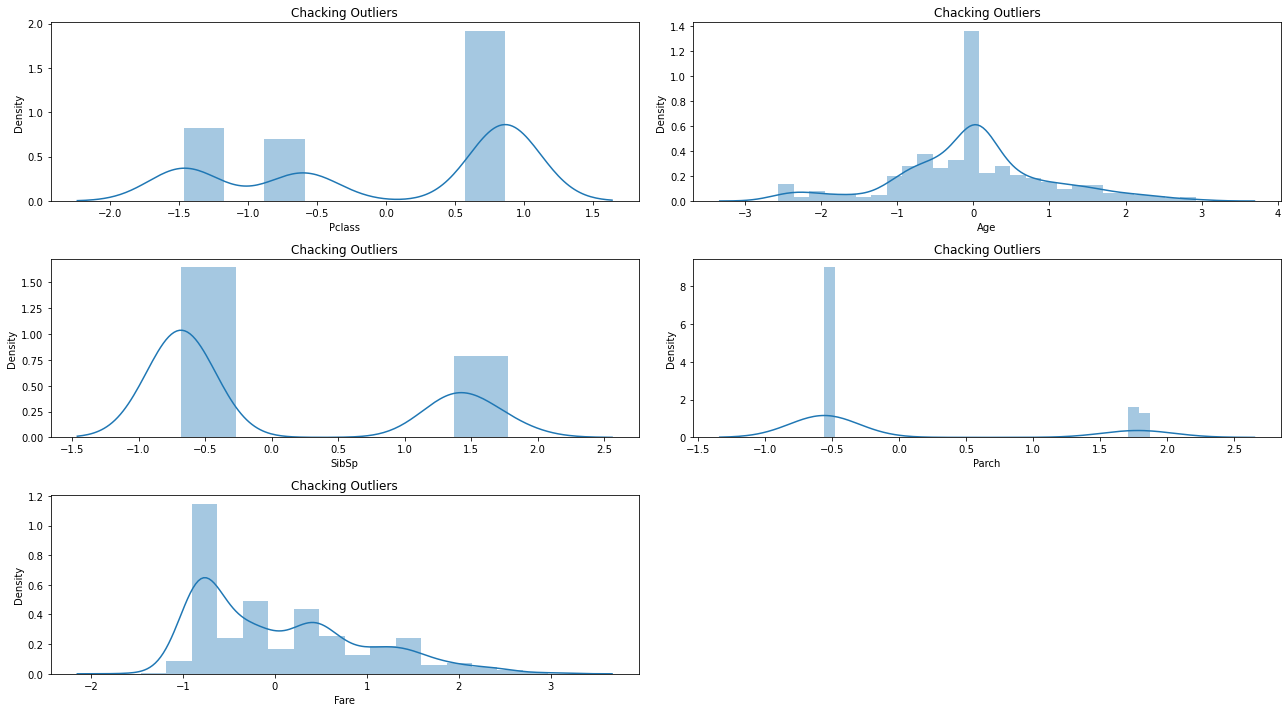

In [234]:
plt.figure(figsize=(18,10),facecolor='white')
plot = 1
for column in numerical_data_pt:
    if plot<=6:
        plt.subplot(3,2,plot)
        sns.distplot(numerical_data_pt[column])
        plt.title("Chacking Outliers")
    plot+=1
plt.tight_layout()

In [235]:
#All data set join 
new_df = numerical_data_pt.join(objective_data)
new_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,0.862195,-0.554560,1.370604,-0.561077,-0.876580,male,B96,S
1,-1.462715,0.661897,1.370604,-0.561077,1.341242,female,C85,C
2,0.862195,-0.239235,-0.680934,-0.561077,-0.787660,female,B96,S
3,-1.462715,0.441937,1.370604,-0.561077,1.071865,female,C123,S
4,0.862195,0.441937,-0.680934,-0.561077,-0.772006,male,B96,S


In [236]:
new_df = new_df.join(target_column)
new_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked,Survived
0,0.862195,-0.554560,1.370604,-0.561077,-0.876580,male,B96,S,0.0
1,-1.462715,0.661897,1.370604,-0.561077,1.341242,female,C85,C,1.0
2,0.862195,-0.239235,-0.680934,-0.561077,-0.787660,female,B96,S,1.0
3,-1.462715,0.441937,1.370604,-0.561077,1.071865,female,C123,S,1.0
4,0.862195,0.441937,-0.680934,-0.561077,-0.772006,male,B96,S,0.0


In [237]:
new_df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         2
Cabin       2
Embarked    2
Survived    2
dtype: int64

In [238]:
new_df = new_df.dropna()

In [239]:
new_df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Cabin       0
Embarked    0
Survived    0
dtype: int64

Use get_dummies for objective data types

In [240]:
#deal with objective data
new_df = pd.get_dummies(data=new_df,columns=['Sex','Cabin','Embarked'])

In [241]:
new_df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.862195,-0.554560,1.370604,-0.561077,-0.876580,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.462715,0.661897,1.370604,-0.561077,1.341242,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.862195,-0.239235,-0.680934,-0.561077,-0.787660,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.462715,0.441937,1.370604,-0.561077,1.071865,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.862195,0.441937,-0.680934,-0.561077,-0.772006,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [242]:
new_df.shape

(870, 156)

In [243]:
#now split data into feature and target
target_df = new_df['Survived']
feature_df = new_df.drop(columns=['Survived'])

In [244]:
target_df.isna().sum()

0

In [245]:
feature_df.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
             ..
Cabin_G6      0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Length: 155, dtype: int64

Now data looks good and all proceses is completed

In [246]:
#standerScaler 
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()

In [247]:
feature_df_scaled = sds.fit_transform(feature_df)
feature_df_scaled

array([[ 0.85169722, -0.54950219,  1.35480017, ..., -0.48196952,
        -0.30264414,  0.61188854],
       [-1.47632863,  0.67795674,  1.35480017, ...,  2.07482   ,
        -0.30264414, -1.63428458],
       [ 0.85169722, -0.23132523, -0.68821927, ..., -0.48196952,
        -0.30264414,  0.61188854],
       ...,
       [ 0.85169722,  0.0554752 ,  1.35480017, ..., -0.48196952,
        -0.30264414,  0.61188854],
       [-1.47632863, -0.23132523, -0.68821927, ..., -0.48196952,
        -0.30264414,  0.61188854],
       [ 0.85169722,  0.23073061, -0.68821927, ..., -0.48196952,
        -0.30264414,  0.61188854]])

In [248]:
# Let's check the VIF Score first..

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(feature_df_scaled,i) for i in range(feature_df_scaled.shape[1])]
vif["Features"] = feature_df.columns
                    
vif.head(5)

,VIF Score,Features
0,3.354476,Pclass
1,1.518809,Age
2,1.740955,SibSp
3,1.866879,Parch
4,4.267294,Fare


All the VIF Scores are less than 5. Now it is cross verified that multicollinearity is not exists between the features. Let's do the analysis of target column now.

In [249]:
#now chack target column
target_df.value_counts()

0.0    538
1.0    332
Name: Survived, dtype: int64

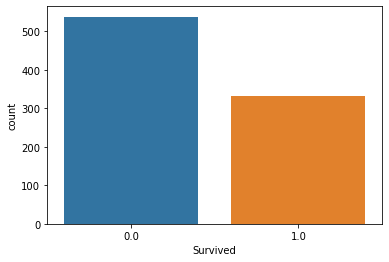

In [250]:
sns.countplot(target_df)
plt.show()

target data is imblenced so we use over sampling

In [251]:
#import six
#import joblib
#import sys
#sys.modules['sklearn.externals.six'] = six
#sys.modules['sklearn.externals.joblib'] = joblib
#from imblearn.over_sampling import SMOTE

In [252]:
#over_sample = SMOTE(0.75)
#feature_df,target_df = over_sample.fit_resample(feature_df,target_df)

In [253]:
#now target data looks good
#target_df.value_counts()

Number of component explaining 95% variance :  140


[]

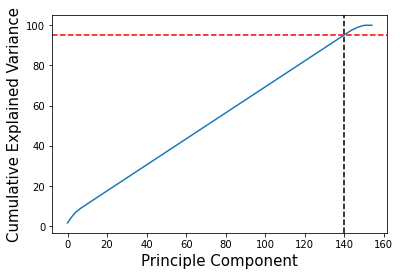

In [254]:
#use pca for best features

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(feature_df_scaled)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>95)
print("Number of component explaining 95% variance : ",k)

plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=15)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=95, color='r', linestyle='--')
plt.plot(var_cumu)
plt.plot()

In [255]:
#only 140 component is good for this
pca = PCA(n_components=140)

In [256]:
feature_df_scaled_pca_final = pca.fit_transform(feature_df_scaled)

In [257]:
feature_df_scaled_pca_final

array([[-1.30088118e+00, -1.06450600e+00,  1.11777410e-03, ...,
        -2.81529730e-15, -1.58188623e-15,  6.03312694e-16],
       [ 4.39138092e+00,  4.01565560e+00,  1.90128158e+00, ...,
        -1.68515816e-02, -5.29807707e+00,  6.91772166e+00],
       [ 7.16363590e-01, -7.68253561e-01, -1.93542663e+00, ...,
         9.79566781e-17,  1.60387469e-15, -4.56356613e-16],
       ...,
       [-1.78333966e+00,  3.87910221e-01,  6.73615901e-01, ...,
         3.92755667e-16, -1.21767021e-15, -7.73056328e-17],
       [ 1.74457816e+00,  2.44141710e+00, -2.85838572e+00, ...,
         3.52429956e+00,  2.82635146e+00, -3.46617863e+00],
       [ 7.41022710e-01, -7.49244604e-01, -1.97673695e+00, ...,
         4.99301798e-16,  1.70814991e-16, -1.96255540e-16]])

# Modal building

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [259]:
# Let's find the best random state

def model(mod):
    max_auc = 0
    max_state = 0
    for i in range(1,201):
        x_train,x_test,y_train,y_test = train_test_split(feature_df_scaled_pca_final,target_df,test_size = 0.25, random_state =i)
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        auc_scor = accuracy_score(y_test, y_pred)
        if auc_scor>max_auc:
            max_auc=auc_scor
            max_state=i
    print("Best Accuracy Score corresponding to ",max_state,"is ",auc_scor)
    print("Classifiation Report-->\n\n",classification_report(y_test,y_pred))

# Modal building Final

In [284]:
def Modal_all(mob):
    x_train,x_test,y_train,y_test = train_test_split(feature_df_scaled_pca_final,target_df,random_state=150,test_size=0.25)
    mob.fit(x_train,y_train)
    y_pre = mob.predict(x_test)
    
    print("Accuracy score of this modal is :\n",accuracy_score(y_test,y_pre))
    
    print("Confusion matrix of this modal is :\n",confusion_matrix(y_test,y_pre))
    
    print("Classification report of this modal is :\n",classification_report(y_test,y_pre))
    
    print("Cross Validation Score : ",cross_val_score(mob,feature_df_scaled_pca_final,target_df,cv=5).mean())
    

# Logistic Regression

In [285]:
log_regression = LogisticRegression()
Modal_all(log_regression)


Accuracy score of this modal is :
 0.8119266055045872
Confusion matrix of this modal is :
 [[127  15]
 [ 26  50]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       142
         1.0       0.77      0.66      0.71        76

    accuracy                           0.81       218
   macro avg       0.80      0.78      0.79       218
weighted avg       0.81      0.81      0.81       218

Cross Validation Score :  0.7494252873563217


# Random Forest

In [286]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier()
Modal_all(rand_for)

Accuracy score of this modal is :
 0.8165137614678899
Confusion matrix of this modal is :
 [[125  17]
 [ 23  53]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       142
         1.0       0.76      0.70      0.73        76

    accuracy                           0.82       218
   macro avg       0.80      0.79      0.79       218
weighted avg       0.81      0.82      0.81       218

Cross Validation Score :  0.7275862068965517


# Knn Modal

In [287]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
Modal_all(knn_class)

Accuracy score of this modal is :
 0.7981651376146789
Confusion matrix of this modal is :
 [[128  14]
 [ 30  46]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       142
         1.0       0.77      0.61      0.68        76

    accuracy                           0.80       218
   macro avg       0.79      0.75      0.76       218
weighted avg       0.79      0.80      0.79       218

Cross Validation Score :  0.7505747126436783


# DecisionTreeClassification

In [288]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
Modal_all(d_tree)

Accuracy score of this modal is :
 0.7752293577981652
Confusion matrix of this modal is :
 [[115  27]
 [ 22  54]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       142
         1.0       0.67      0.71      0.69        76

    accuracy                           0.78       218
   macro avg       0.75      0.76      0.76       218
weighted avg       0.78      0.78      0.78       218

Cross Validation Score :  0.6839080459770115


# AdaBoostclassification

In [289]:
from sklearn.ensemble import AdaBoostClassifier
ada_class = AdaBoostClassifier()
Modal_all(ada_class)

Accuracy score of this modal is :
 0.8119266055045872
Confusion matrix of this modal is :
 [[126  16]
 [ 25  51]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       142
         1.0       0.76      0.67      0.71        76

    accuracy                           0.81       218
   macro avg       0.80      0.78      0.79       218
weighted avg       0.81      0.81      0.81       218

Cross Validation Score :  0.7574712643678161


# GradientBoostingclassification

In [290]:
from sklearn.ensemble import GradientBoostingClassifier
g_class = GradientBoostingClassifier()
Modal_all(g_class)

Accuracy score of this modal is :
 0.8394495412844036
Confusion matrix of this modal is :
 [[130  12]
 [ 23  53]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       142
         1.0       0.82      0.70      0.75        76

    accuracy                           0.84       218
   macro avg       0.83      0.81      0.82       218
weighted avg       0.84      0.84      0.84       218

Cross Validation Score :  0.764367816091954


# SVM

In [291]:
from sklearn.svm import SVC
scv = SVC()
Modal_all(scv)

Accuracy score of this modal is :
 0.8440366972477065
Confusion matrix of this modal is :
 [[122  20]
 [ 14  62]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       142
         1.0       0.76      0.82      0.78        76

    accuracy                           0.84       218
   macro avg       0.83      0.84      0.83       218
weighted avg       0.85      0.84      0.85       218

Cross Validation Score :  0.760919540229885


# Bagging Classifier

In [278]:
from sklearn.ensemble import BaggingClassifier

beg_class = BaggingClassifier()

Modal_all(beg_class)

Accuracy score of this modal is :
 0.8348623853211009
Confusion matrix of this modal is :
 [[127  15]
 [ 21  55]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       142
         1.0       0.79      0.72      0.75        76

    accuracy                           0.83       218
   macro avg       0.82      0.81      0.81       218
weighted avg       0.83      0.83      0.83       218



# Let's check ROC AUC Curve for the fitted model

In [277]:
x_train,x_test,y_train,y_test = train_test_split(feature_df_scaled_pca_final,target_df,random_state=150,test_size=0.25)

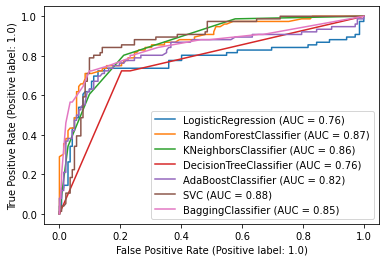

In [280]:
from sklearn.metrics import roc_auc_score,plot_roc_curve
disp = plot_roc_curve(log_regression, x_test, y_test)
plot_roc_curve(rand_for, x_test, y_test,ax=disp.ax_)
plot_roc_curve(knn_class, x_test, y_test,ax=disp.ax_)
plot_roc_curve(d_tree, x_test, y_test,ax=disp.ax_)
plot_roc_curve(ada_class, x_test, y_test,ax=disp.ax_)
plot_roc_curve(scv, x_test, y_test,ax=disp.ax_)
plot_roc_curve(beg_class,x_test,y_test,ax=disp.ax_)

plt.legend(prop={"size":10},loc="lower right")
plt.show()

Clearly seeing that svc modal is good.

# Hyper perameter tunning

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
scv = SVC()

In [296]:
perameter = {
              'degree':[3,4,5],
               'gamma':['scale', 'auto'],
              'probability':[True,False],
              'class_weight':['dist','balanced']}

In [297]:
grid_serch = GridSearchCV(estimator=scv,param_grid=perameter,cv=3)
grid_serch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'class_weight': ['dist', 'balanced'],
                         'degree': [3, 4, 5], 'gamma': ['scale', 'auto'],
                         'probability': [True, False]})

In [298]:
grid_serch.best_params_

{'class_weight': 'balanced',
 'degree': 3,
 'gamma': 'scale',
 'probability': True}

In [299]:
grid_serch.best_estimator_

SVC(class_weight='balanced', probability=True)

# Final Modal building

In [305]:
svc = SVC(class_weight='balanced',degree=3,gamma='scale',probability=True)

In [306]:
Modal_all(svc)

Accuracy score of this modal is :
 0.8440366972477065
Confusion matrix of this modal is :
 [[122  20]
 [ 14  62]]
Classification report of this modal is :
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       142
         1.0       0.76      0.82      0.78        76

    accuracy                           0.84       218
   macro avg       0.83      0.84      0.83       218
weighted avg       0.85      0.84      0.85       218

Cross Validation Score :  0.764367816091954


# Save modal

In [308]:
import joblib
joblib.dump(svc,"Final_Titanic_Project_Model.plk")

['Final_Titanic_Project_Model.plk']